In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import causallearn
import re

from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import io
import os
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import Normalize
import matplotlib as mp
from matplotlib.ticker import FuncFormatter

In [2]:
import matplotlib.pyplot as plt
import numpy as np
data_contention =[38679,19151,16935,16003,15082,15239,14153,16045,16148,16631];

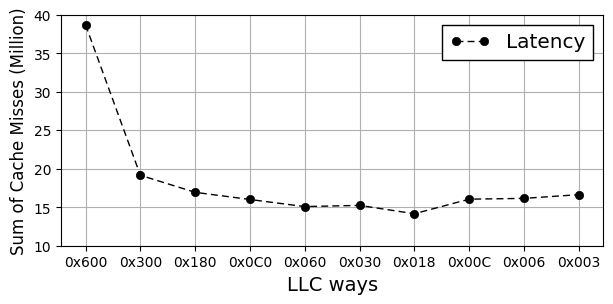

In [3]:
fig, ax = plt.subplots(facecolor='white', figsize=(7,3))
plt.style.use('classic')
xx = ["0x600","0x300","0x180","0x0C0","0x060","0x030","0x018","0x00C","0x006","0x003"]
#xx=[1,2,4,20]
ax.plot(xx,[i/1000 for i in data_contention], marker='o', markersize=6, c='k', linestyle='-', linewidth=1, dashes=(5, 3), label="Latency")
ax.set_xlabel(f'LLC ways', size='14')
ax.set_ylabel("Sum of Cache Misses (Million)", size='12')
ax.legend(loc='upper right')
#ax.set_ylim([0,6])
ax.grid()
#save figure
folder_path = '..\\figure\\ndpi'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, f'llc_latency.pdf' )

plt.show()

In [19]:
import csv

def process_csv_file(filename, num_cores):
    ipc_data = [[] for _ in range(num_cores)]
    misses_data = [[] for _ in range(num_cores)]
    llc_data = [[] for _ in range(num_cores)]
    mbl_data = [[] for _ in range(num_cores)]
    mbr_data = [[] for _ in range(num_cores)]

    with open(filename, 'r') as csvfile:
        reader = csv.DictReader(csvfile, delimiter='\t')
        for row in reader:
            # Skip non-data rows
            if 'TIME' in row:
                continue

            for key, value in row.items():
                try:
                    data_parts = value.split()
                    current_core = int(data_parts[0])
                    if current_core < num_cores:
                        ipc_data[current_core].append(float(data_parts[1]))
                        misses_data[current_core].append(float(data_parts[2][:-1]) * 1000)
                        llc_data[current_core].append(float(data_parts[3]))
                        mbl_data[current_core].append(float(data_parts[4]))
                        mbr_data[current_core].append(float(data_parts[5]))
                except ValueError:
                    # Handle cases where conversion to int or float fails
                    pass

    return ipc_data, misses_data, llc_data, mbl_data, mbr_data



In [23]:
# user example
filename = '..\\way_allocated_sensitive\\tmp_l2fwd_0x600.csv'
num_cores = 5
ipc, misses, llc, mbl, mbr = process_csv_file(filename, num_cores)

# cache miss comparision -l3fwd

In [81]:
#vnfs="l3fwd"
params= ["0x600", "0x300", "0x180", "0xc0", "0x60", "0x30", "0x18", "0xc", "0x6", "0x3"]
num_cores = 5
vnfs="l3fwd"
# Dictionary to store the results for each file
results = {}
for param in params:
    filename =  f'..\\way_allocated_sensitive\\tmp_{vnfs}_{param}.csv'
    ipc, misses, llc, mbl, mbr = process_csv_file(filename, num_cores)
    results[param] = {
        'ipc': ipc,
        'misses': misses,
        'llc': llc,
        'mbl': mbl,
        'mbr': mbr
    }


In [82]:
print(results["0x600"]["misses"][2])

[1000.0, 35000.0, 31000.0, 33000.0, 35000.0, 32000.0, 32000.0, 34000.0, 35000.0, 32000.0, 32000.0, 33000.0, 34000.0, 33000.0, 34000.0, 12000.0, 1000.0, 30000.0, 32000.0, 33000.0, 33000.0, 34000.0, 34000.0, 37000.0, 40000.0, 38000.0, 39000.0, 37000.0, 37000.0, 39000.0, 39000.0, 10000.0, 1000.0, 39000.0, 40000.0, 39000.0, 37000.0, 38000.0, 39000.0, 40000.0, 40000.0, 38000.0, 39000.0, 39000.0, 37000.0, 37000.0, 38000.0, 9000.0, 1000.0, 40000.0, 40000.0, 32000.0, 40000.0, 40000.0, 37000.0, 39000.0, 37000.0, 37000.0, 38000.0, 38000.0, 38000.0, 39000.0, 39000.0, 8000.0, 1000.0, 38000.0, 39000.0, 39000.0, 39000.0, 37000.0, 40000.0, 39000.0, 46000.0, 39000.0, 40000.0, 39000.0, 40000.0, 40000.0, 38000.0, 9000.0, 1000.0, 38000.0, 40000.0, 40000.0, 42000.0, 40000.0, 39000.0, 41000.0, 41000.0, 41000.0, 42000.0, 41000.0, 42000.0, 42000.0, 42000.0, 8000.0, 1000.0, 40000.0, 40000.0, 41000.0, 41000.0, 41000.0, 38000.0, 39000.0, 39000.0, 40000.0, 41000.0, 40000.0, 40000.0, 41000.0, 40000.0, 13000.0, 10

In [83]:


import matplotlib.pyplot as plt

data={}
params= ["0x600", "0x300", "0x180", "0xc0", "0x60", "0x30", "0x18", "0xc", "0x6", "0x3"]

for param in params:
    #data[param]=np.sum(results[param]['misses'],axis=0)
    data[param]=results[param]['misses'][0]+results[param]['misses'][1]+results[param]['misses'][2]+results[param]['misses'][3]
    #data[param]=results[param]['misses'][2]



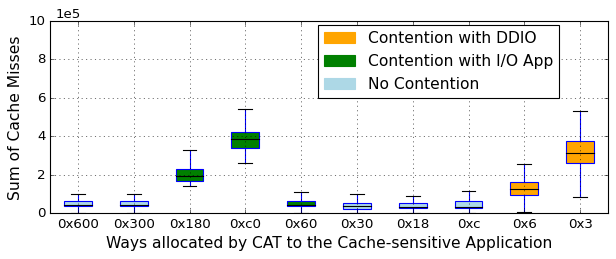

In [84]:
import matplotlib.pyplot as plt
import numpy as np
import os
boxplot_data = [data[param] for param in params]
boxplot_data = [[item/100000 for item in sublist] for sublist in boxplot_data]

params= ["0x600", "0x300", "0x180", "0xc0", "0x60", "0x30", "0x18", "0xc", "0x6", "0x3"]

fig, ax = plt.subplots(facecolor='white', figsize=(9, 3))
plt.style.use('classic')

boxplot_dict = plt.boxplot(boxplot_data, vert=True, patch_artist=True, showfliers=False)

# box color
colors = ['lightblue', 'lightblue', 'green', 'green', 'green',  'lightblue', 'lightblue', 'lightblue', 'orange', 'orange']
for patch, color in zip(boxplot_dict['boxes'], colors):
    patch.set_facecolor(color)

for whisker in boxplot_dict['whiskers']:
    whisker.set_linestyle('-') 
plt.setp(boxplot_dict['medians'], color='black')

# legend
legend_colors = ['orange', 'green', 'lightblue']
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in legend_colors]
#plt.legend(legend_handles, legend_labels)
#ax.legend(legend_handles, ['Contention with DDIO', 'Contention with I/O App', 'No Contention'], fontsize = 12,loc='upper left')
ax.legend(legend_handles, ['Contention with DDIO', 'Contention with I/O App', 'No Contention'], fontsize=14, loc=(0.48, 0.6))

left, right = ax.get_xlim()
plt.xticks(range(1, len(params) + 1), params)
plt.xlabel('Ways allocated by CAT to the Cache-sensitive Application',fontsize=14)
plt.ylabel('Sum of Cache Misses', fontsize=14)
plt.ylim(0,10)
plt.grid()
ax.text(0.01, 1.07, '1e5', transform=ax.transAxes, fontsize=12, verticalalignment='top')#, bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', edgecolor='black'))

folder_path = '../figure/way_sensitive/'  
file_name = f'llc_allocation_{vnfs}.pdf'
full_path=folder_path+file_name
#plt.savefig(full_path, bbox_inches='tight')

plt.show()


In [85]:


import matplotlib.pyplot as plt

data={}
params= ["0x600", "0x300", "0x180", "0xc0", "0x60", "0x30", "0x18", "0xc", "0x6", "0x3"]

for param in params:
    #data[param]=np.sum(results[param]['misses'],axis=0)
    #data[param]=results[param]['misses'][0]+results[param]['misses'][1]
    data[param]=results[param]['misses'][4]

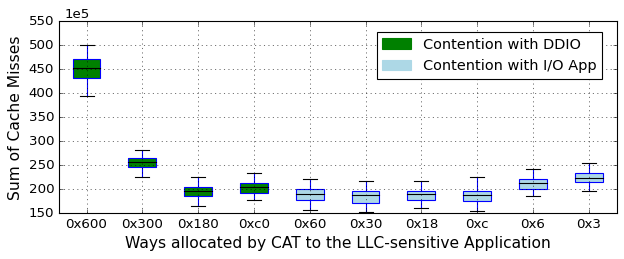

In [86]:
import matplotlib.pyplot as plt
import numpy as np

boxplot_data = [data[param] for param in params]
boxplot_data = [[item/100000 for item in sublist] for sublist in boxplot_data]

params= ["0x600", "0x300", "0x180", "0xc0", "0x60", "0x30", "0x18", "0xc", "0x6", "0x3"]

fig, ax = plt.subplots(facecolor='white', figsize=(9, 3))
plt.style.use('classic')

boxplot_dict = plt.boxplot(boxplot_data, vert=True, patch_artist=True, showfliers=False)

# box color
colors = ['green', 'green', 'green', 'green', 'lightblue',  'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue',]
for patch, color in zip(boxplot_dict['boxes'], colors):
    patch.set_facecolor(color)

for whisker in boxplot_dict['whiskers']:
    whisker.set_linestyle('-') 
plt.setp(boxplot_dict['medians'], color='black')

# legend
legend_colors = [ 'green', 'lightblue']
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in legend_colors]
#plt.legend(legend_handles, legend_labels)
#ax.legend(legend_handles, ['Contention with DDIO', 'Contention with I/O App', 'No Contention'], fontsize = 12,loc='upper left')
ax.legend(legend_handles, ['Contention with DDIO', 'Contention with I/O App', 'No Contention'], fontsize=13, loc=(0.57, 0.7))

left, right = ax.get_xlim()
plt.xticks(range(1, len(params) + 1), params)
plt.xlabel('Ways allocated by CAT to the LLC-sensitive Application',fontsize=14)
plt.ylabel('Sum of Cache Misses', fontsize=14)
#plt.ylim(0,2)
plt.grid()
ax.text(0.01, 1.07, '1e5', transform=ax.transAxes, fontsize=12, verticalalignment='top')#, bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', edgecolor='black'))
folder_path = '../figure/way_sensitive/'  
file_name = f'water_nsquared_{vnfs}.pdf'
full_path=folder_path+file_name
plt.savefig(full_path,bbox_inches='tight')
plt.show()


# Cache miss comparision -l2fwd

In [87]:
#vnfs="l3fwd"
params= ["0x600", "0x300", "0x180", "0xc0", "0x60", "0x30", "0x18", "0xc", "0x6", "0x3"]
num_cores = 5
vnfs="l2fwd"
# Dictionary to store the results for each file
results = {}
for param in params:
    filename =  f'..\\way_allocated_sensitive\\tmp_{vnfs}_{param}.csv'
    ipc, misses, llc, mbl, mbr = process_csv_file(filename, num_cores)
    results[param] = {
        'ipc': ipc,
        'misses': misses,
        'llc': llc,
        'mbl': mbl,
        'mbr': mbr
    }


In [88]:
import matplotlib.pyplot as plt

data={}
params= ["0x600", "0x300", "0x180", "0xc0", "0x60", "0x30", "0x18", "0xc", "0x6", "0x3"]

for param in params:
    #data[param]=np.sum(results[param]['misses'],axis=0)
    data[param]=results[param]['misses'][0]+results[param]['misses'][1]+results[param]['misses'][2]+results[param]['misses'][3]
    #data[param]=results[param]['misses'][2]

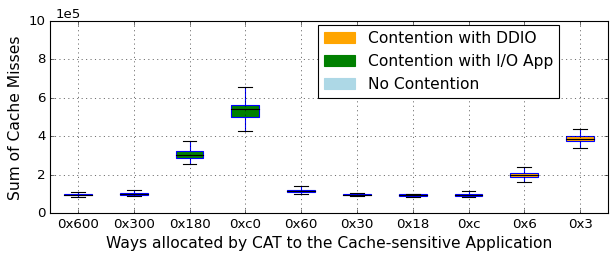

In [89]:
import matplotlib.pyplot as plt
import numpy as np
import os
boxplot_data = [data[param] for param in params]
boxplot_data = [[item/100000 for item in sublist] for sublist in boxplot_data]

params= ["0x600", "0x300", "0x180", "0xc0", "0x60", "0x30", "0x18", "0xc", "0x6", "0x3"]

fig, ax = plt.subplots(facecolor='white', figsize=(9, 3))
plt.style.use('classic')

boxplot_dict = plt.boxplot(boxplot_data, vert=True, patch_artist=True, showfliers=False)

# box color
colors = ['lightblue', 'lightblue', 'green', 'green', 'green',  'lightblue', 'lightblue', 'lightblue', 'orange', 'orange']
for patch, color in zip(boxplot_dict['boxes'], colors):
    patch.set_facecolor(color)

for whisker in boxplot_dict['whiskers']:
    whisker.set_linestyle('-') 
plt.setp(boxplot_dict['medians'], color='black')

# legend
legend_colors = ['orange', 'green', 'lightblue']
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in legend_colors]
#plt.legend(legend_handles, legend_labels)
#ax.legend(legend_handles, ['Contention with DDIO', 'Contention with I/O App', 'No Contention'], fontsize = 12,loc='upper left')
ax.legend(legend_handles, ['Contention with DDIO', 'Contention with I/O App', 'No Contention'], fontsize=14, loc=(0.48, 0.6))

left, right = ax.get_xlim()
plt.xticks(range(1, len(params) + 1), params)
plt.xlabel('Ways allocated by CAT to the Cache-sensitive Application',fontsize=14)
plt.ylabel('Sum of Cache Misses', fontsize=14)
plt.ylim(0,10)
plt.grid()
ax.text(0.01, 1.07, '1e5', transform=ax.transAxes, fontsize=12, verticalalignment='top')#, bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', edgecolor='black'))

folder_path = '../figure/way_sensitive/'  
file_name = f'llc_allocation_{vnfs}.pdf'
full_path=folder_path+file_name
plt.savefig(full_path, bbox_inches='tight')

plt.show()

In [91]:


import matplotlib.pyplot as plt

data={}
params= ["0x600", "0x300", "0x180", "0xc0", "0x60", "0x30", "0x18", "0xc", "0x6", "0x3"]

for param in params:
    #data[param]=np.sum(results[param]['misses'],axis=0)
    #data[param]=results[param]['misses'][0]+results[param]['misses'][1]
    data[param]=results[param]['misses'][4]

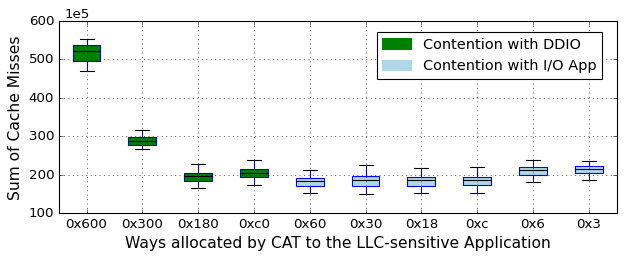

In [92]:
import matplotlib.pyplot as plt
import numpy as np

boxplot_data = [data[param] for param in params]
boxplot_data = [[item/100000 for item in sublist] for sublist in boxplot_data]

params= ["0x600", "0x300", "0x180", "0xc0", "0x60", "0x30", "0x18", "0xc", "0x6", "0x3"]

fig, ax = plt.subplots(facecolor='white', figsize=(9, 3))
plt.style.use('classic')

boxplot_dict = plt.boxplot(boxplot_data, vert=True, patch_artist=True, showfliers=False)

# box color
colors = ['green', 'green', 'green', 'green', 'lightblue',  'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue',]
for patch, color in zip(boxplot_dict['boxes'], colors):
    patch.set_facecolor(color)

for whisker in boxplot_dict['whiskers']:
    whisker.set_linestyle('-') 
plt.setp(boxplot_dict['medians'], color='black')

# legend
legend_colors = [ 'green', 'lightblue']
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in legend_colors]
#plt.legend(legend_handles, legend_labels)
#ax.legend(legend_handles, ['Contention with DDIO', 'Contention with I/O App', 'No Contention'], fontsize = 12,loc='upper left')
ax.legend(legend_handles, ['Contention with DDIO', 'Contention with I/O App', 'No Contention'], fontsize=13, loc=(0.57, 0.7))

left, right = ax.get_xlim()
plt.xticks(range(1, len(params) + 1), params)
plt.xlabel('Ways allocated by CAT to the LLC-sensitive Application',fontsize=14)
plt.ylabel('Sum of Cache Misses', fontsize=14)
#plt.ylim(0,2)
plt.grid()
ax.text(0.01, 1.07, '1e5', transform=ax.transAxes, fontsize=12, verticalalignment='top')#, bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', edgecolor='black'))
folder_path = '../figure/way_sensitive/'  
file_name = f'water_nsquared_{vnfs}.pdf'
full_path=folder_path+file_name
plt.savefig(full_path,bbox_inches='tight')
plt.show()


# Compare-l3-l2

In [93]:
#vnfs="l3fwd"
params= ["0x600", "0x300", "0x180", "0xc0", "0x60", "0x30", "0x18", "0xc", "0x6", "0x3"]
num_cores = 5
vnfs="l2fwd"
# Dictionary to store the results for each file
results_l2fwd = {}
for param in params:
    filename =  f'..\\way_allocated_sensitive\\tmp_{vnfs}_{param}.csv'
    ipc, misses, llc, mbl, mbr = process_csv_file(filename, num_cores)
    results_l2fwd [param] = {
        'ipc': ipc,
        'misses': misses,
        'llc': llc,
        'mbl': mbl,
        'mbr': mbr
    }
vnfs="l3fwd"
# Dictionary to store the results for each file
results_l3fwd = {}
for param in params:
    filename =  f'..\\way_allocated_sensitive\\tmp_{vnfs}_{param}.csv'
    ipc, misses, llc, mbl, mbr = process_csv_file(filename, num_cores)
    results_l3fwd [param] = {
        'ipc': ipc,
        'misses': misses,
        'llc': llc,
        'mbl': mbl,
        'mbr': mbr
    }

In [94]:

import matplotlib.pyplot as plt

data_l2fwd={}
data_l3fwd={}
params= ["0x600", "0x300", "0x180", "0xc0", "0x60", "0x30", "0x18", "0xc", "0x6", "0x3"]

for param in params:
    #data[param]=np.sum(results[param]['misses'],axis=0)
    data_l2fwd[param]=results_l2fwd[param]['misses'][0]+results_l2fwd[param]['misses'][1]+results_l2fwd[param]['misses'][2]+results_l2fwd[param]['misses'][3]
    data_l3fwd[param]=results_l3fwd[param]['misses'][0]+results_l3fwd[param]['misses'][1]+results_l3fwd[param]['misses'][2]+results_l3fwd[param]['misses'][3]
    #data[param]=results[param]['misses'][2]


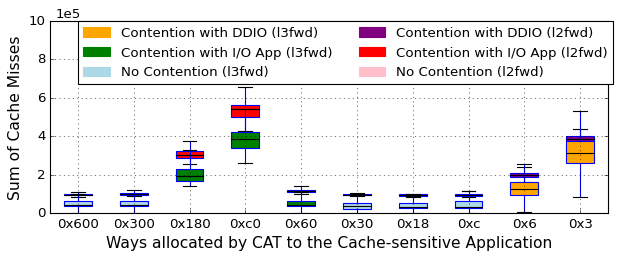

In [95]:
import matplotlib.pyplot as plt
import numpy as np
import os
boxplot_data = [data_l2fwd[param] for param in params]
boxplot_data = [[item/100000 for item in sublist] for sublist in boxplot_data]

params= ["0x600", "0x300", "0x180", "0xc0", "0x60", "0x30", "0x18", "0xc", "0x6", "0x3"]

fig, ax = plt.subplots(facecolor='white', figsize=(9, 3))
plt.style.use('classic')

boxplot_dict = plt.boxplot(boxplot_data, vert=True, patch_artist=True, showfliers=False)

# box color
colors = ['pink', 'pink', 'red', 'red', 'red',  'pink', 'pink', 'pink', 'purple', 'purple']
for patch, color in zip(boxplot_dict['boxes'], colors):
    patch.set_facecolor(color)

for whisker in boxplot_dict['whiskers']:
    whisker.set_linestyle('-') 
plt.setp(boxplot_dict['medians'], color='black')

# legend
legend_colors = ['purple', 'red', 'pink']
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in legend_colors]
#plt.legend(legend_handles, legend_labels)
#ax.legend(legend_handles, ['Contention with DDIO', 'Contention with I/O App', 'No Contention'], fontsize = 12,loc='upper left')
ax.legend(legend_handles, ['Contention with DDIO (l2fwd)', 'Contention with I/O App (l2fwd)', 'No Contention (l2fwd)'], fontsize=14, loc=(0.48, 0.6))


#

boxplot_data = [data_l3fwd[param] for param in params]
boxplot_data = [[item/100000 for item in sublist] for sublist in boxplot_data]

params= ["0x600", "0x300", "0x180", "0xc0", "0x60", "0x30", "0x18", "0xc", "0x6", "0x3"]


boxplot_dict = plt.boxplot(boxplot_data, vert=True, patch_artist=True, showfliers=False)

# box color
colors = ['lightblue', 'lightblue', 'green', 'green', 'green',  'lightblue', 'lightblue', 'lightblue', 'orange', 'orange']
for patch, color in zip(boxplot_dict['boxes'], colors):
    patch.set_facecolor(color)

for whisker in boxplot_dict['whiskers']:
    whisker.set_linestyle('-') 
plt.setp(boxplot_dict['medians'], color='black')

# legend
legend_colors = ['orange', 'green', 'lightblue','purple', 'red', 'pink']
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in legend_colors]
ax.legend(legend_handles, ['Contention with DDIO (l3fwd)', 'Contention with I/O App (l3fwd)', 'No Contention (l3fwd)','Contention with DDIO (l2fwd)', 
                           'Contention with I/O App (l2fwd)', 'No Contention (l2fwd)'],  ncol=2,fontsize=12, loc=(0.05, 0.67))


#




left, right = ax.get_xlim()
plt.xticks(range(1, len(params) + 1), params)
plt.xlabel('Ways allocated by CAT to the Cache-sensitive Application',fontsize=14)
plt.ylabel('Sum of Cache Misses', fontsize=14)
plt.ylim(0,10)
plt.grid()
ax.text(0.01, 1.07, '1e5', transform=ax.transAxes, fontsize=12, verticalalignment='top')#, bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', edgecolor='black'))

folder_path = '../figure/way_sensitive/'  
file_name = f'llc_allocation_l2_l3_comparision.pdf'
full_path=folder_path+file_name
plt.savefig(full_path, bbox_inches='tight')

plt.show()